In [1]:
pip install https://github.com/PatrickKudo/flappy-bird-gymnasium/archive/refs/heads/main.zip

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     - 41.2 MB 25.2 MB/s 0:00:02m
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 18.5 MB/s eta 0:00:0000:0100:01
  Created wheel for flappy-bird-gymnasium: filename=flappy_bird_gymnasium-0.4.0-py3-none-any.whl size=37337018 sha256=b89f1d5f7522d21742a8a68a3432f9aff2420b55706376d046d0bdd3667f6c0c
  Stored in directory: /tmp/pip-ephem-wheel-cache-exktaznk/wheels/6e/f8/00/7807e10b4bba49600d7d76add87ae23897260f5e9e3ddc292a
Successfully built flappy-bird-gymnasium
Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
# if GPU is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())

True


In [3]:
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
os.environ["SDL_AUDIODRIVER"] = "dummy"

import pygame
pygame.init()

pygame 2.5.2 (SDL 2.28.2, Python 3.11.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


(5, 0)

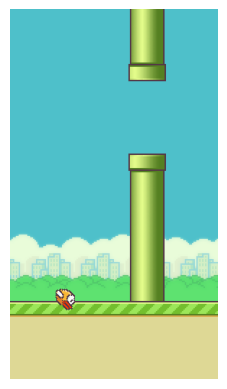

In [4]:
import gymnasium
import matplotlib.pyplot as plt
import numpy as np
import pygame
from IPython.display import display, clear_output
import flappy_bird_gymnasium
import time

env = gymnasium.make(
    "FlappyBird-v0", audio_on=False, render_mode="rgb_array", use_lidar=False
)

steps = 0

obs = env.reset()
while True:
    # Getting action:
    action = 0
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            pygame.quit()
        if event.type == pygame.KEYDOWN and (
            event.key == pygame.K_SPACE or event.key == pygame.K_UP
        ):
            action = 1

    # Processing:
    obs, _, done, _, info = env.step(action)

    # Get the RGB image of the game screen:
    rgb_image = env.render()

    steps += 1
    print(
        f"Action: {action}\n"
        f"Score: {info['score']}\n Steps: {steps}\n"
    )

    # Display the game screen:
    plt.imshow(rgb_image)
    plt.axis('off')
    display(plt.gcf())
    clear_output(wait=True)
    time.sleep(0.2)

    if done:
        break

env.close()